In [1]:
import pandas as pd
import datetime
import numpy as np
import os
import glob
import matplotlib.pyplot as plt

In [2]:
def date(str): 
    return str[:10]

In [3]:
#dataframe with daily number of transients 
daily_transients = pd.read_csv('daily_number_transients.csv', index_col=0)
daily_transients.rename(columns={'number of events':'transients'}, inplace=True)
daily_transients['Date'] = pd.to_datetime(daily_transients['Date'], dayfirst=True)
daily_transients.reset_index(inplace=True)
daily_transients.head()

,index,Date,transients
0,0,2018-08-02,347
1,1,2018-08-04,122
2,2,2018-08-05,222
3,3,2018-08-06,559
4,4,2018-08-07,411


In [4]:
#dataframe with daily number of transients 
daily_non_transients = pd.read_csv('daily_number_events.csv', index_col=0)
daily_non_transients['Date'] = pd.to_datetime(daily_non_transients['Date'])
daily_non_transients.reset_index(inplace=True)
daily_non_transients

,index,Date,continuous
0,0,2018-08-01,0
1,1,2018-08-02,2758
2,2,2018-08-03,0
3,3,2018-08-04,1628
4,4,2018-08-05,3542
...,...,...,...
297,27,2019-05-27,6773
298,28,2019-05-28,5221
299,29,2019-05-29,1003
300,30,2019-05-30,6799


In [5]:
#dataframe with daily temperature data from Oceans2.0 website
folder_path = r'C:\Users\hjh44\OneDrive - University of Bath\Masters Project\Temperature\\'

d = {}  # dictionary that will hold dataframes for each month  
month_array = ['August', 'September', 'October', 'November', 'December', 'January', 'February', 'March', 'April', 'May', 'June', 'July']

path = folder_path + 'ShoreStation_MeteorologicalStation-Lufft_MeteorologicalStation_AirTemperature_20180801T000000Z_20190530T235900Z-NaN_clean.csv'
temp_data = pd.read_csv(path, skiprows=52)

#formatting 
temp_data.drop(temp_data.index[[0]], inplace=True)                                 #drop first row with no data 
temp_data = temp_data.iloc[: , :-3]                                                #remove last 3 columns
temp_data.set_axis(['Time', 'Air Temp', 'Flag'], axis=1, inplace=True)             #rename columns
temp_data['Date'] = temp_data['Time'].apply(date)                                  #just get date

temp_data['Date'] = pd.to_datetime(temp_data['Date'], dayfirst=True)               #convert to timestamp  
temp_data['Air Temp'] = temp_data['Air Temp'].astype(float)                        #convert to float 
daily_temp = temp_data.groupby(by='Date').mean()                                   #new df for daily average temp 
daily_temp.reset_index(inplace=True)                                               #reset index

#add temperature change column 
daily_temp['Temp Change'] = np.nan
for i in range(0, len(daily_temp)-1): 
    daily_temp.loc[i+1, 'Temp Change'] = (daily_temp.loc[i+1, 'Air Temp']) - (daily_temp.loc[i, 'Air Temp'])
    
daily_temp.head(7)

,Date,Air Temp,Flag,Temp Change
0,2018-08-01,7.801555,1.000000,NaN
1,2018-08-02,6.107467,1.000000,-1.694088
2,2018-08-03,6.299008,1.016667,0.191541
3,2018-08-04,8.332302,1.000000,2.033295
4,2018-08-05,7.277796,1.000000,-1.054506
5,2018-08-06,7.077906,1.000000,-0.199890
6,2018-08-07,6.407442,1.000000,-0.670464


In [6]:
#dataframe with daily temperature data from Oceans2.0 website
folder_path = r'C:\Users\hjh44\OneDrive - University of Bath\Masters Project\Temperature\\'

d = {}  # dictionary that will hold dataframes for each month  
month_array = ['August', 'September', 'October', 'November', 'December', 'January', 'February', 'March', 'April', 'May', 'June', 'July']

path = folder_path + 'ShoreStation_MeteorologicalStation-Lufft_MeteorologicalStation_AirTemperature_20180801T000000Z_20190530T235900Z-NaN_clean.csv'
temp_data = pd.read_csv(path, skiprows=52)

#formatting 
temp_data.drop(temp_data.index[[0]], inplace=True)                                 #drop first row with no data 
temp_data = temp_data.iloc[: , :-3]                                                #remove last 3 columns
temp_data.set_axis(['Time', 'Air Temp', 'Flag'], axis=1, inplace=True)             #rename columns
temp_data['Date'] = temp_data['Time'].apply(date)                                  #just get date

temp_data['Date'] = pd.to_datetime(temp_data['Date'], dayfirst=True)               #convert to timestamp  
temp_data['Air Temp'] = temp_data['Air Temp'].astype(float)                        #convert to float 

In [7]:
#dataframe with weekly temperature data from Canadian ice maps 
temp = pd.read_csv('Temp_data.csv')
temp['Date'] = pd.to_datetime(temp['Date'], dayfirst=True)

#add temperature change column 
temp['Temp Change'] = np.nan
for i in range(0, len(temp)-1): 
    temp.loc[i+1, 'Temp Change'] = (temp.loc[i+1, 'Mean Temperature']) - (temp.loc[i, 'Mean Temperature'])

temp.head()

,Date,Mean Temperature,Normal Temperature,Temp Change
0,2018-09-03,4.9,3.3,NaN
1,2018-09-10,1.0,1.8,-3.9
2,2018-09-17,-2.5,0.1,-3.5
3,2018-09-24,-4.4,-2.0,-1.9
4,2018-10-01,-4.9,-4.4,-0.5


In [8]:
daily_transients

,index,Date,transients
0,0,2018-08-02,347
1,1,2018-08-04,122
2,2,2018-08-05,222
3,3,2018-08-06,559
4,4,2018-08-07,411
...,...,...,...
282,26,2019-05-27,1313
283,27,2019-05-28,1121
284,28,2019-05-29,159
285,29,2019-05-30,1687


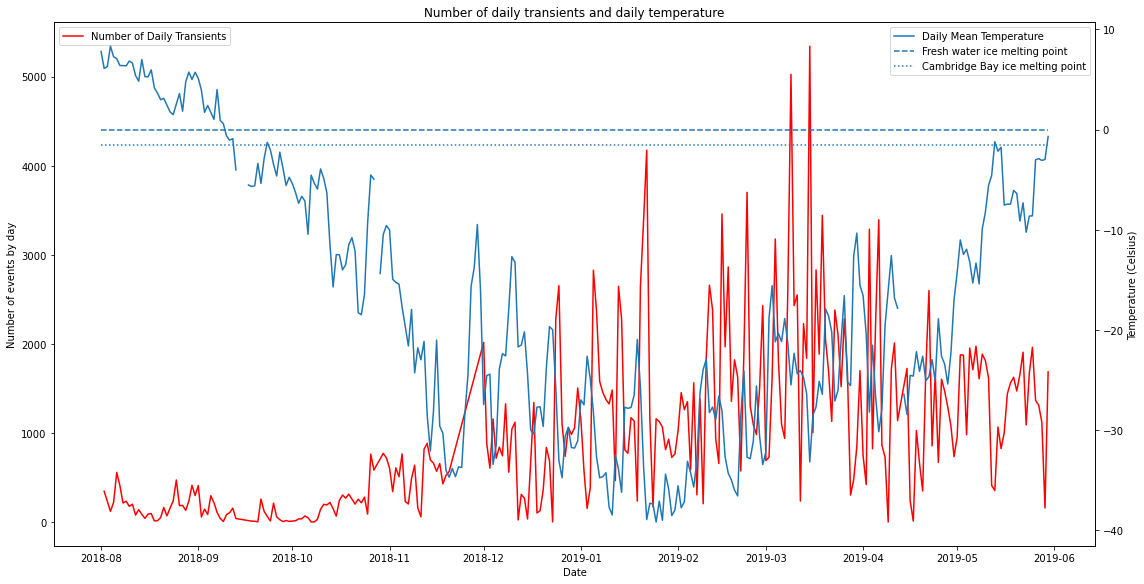

In [25]:
fig, ax = plt.subplots(figsize=(16,8))

ax.plot(daily_transients['Date'], daily_transients['transients'], label='Number of Daily Transients', c='r')

ax2 = ax.twinx()
ax2.plot(daily_temp['Date'], daily_temp['Air Temp'], label='Daily Mean Temperature')
#ax2.plot(temp['Date'], temp['Temp Change'], label='Temperature change')
ax2.hlines(y=0, xmin=pd.to_datetime('2018/08/01'), xmax=pd.to_datetime('2019/05/30'), ls='--', label='Fresh water ice melting point')
ax2.hlines(y=-1.56, xmin=pd.to_datetime('2018/08/01'), xmax=pd.to_datetime('2019/05/30'), ls=':', label='Cambridge Bay ice melting point')


ax.legend(loc='upper left')
ax2.legend(loc='upper right')
ax.set_ylabel('Number of events by day')
ax2.set_ylabel('Temperature (Celsius)')
ax.set_xlabel('Date')

plt.tight_layout()
plt.title('Number of daily transients and daily temperature')
plt.show()

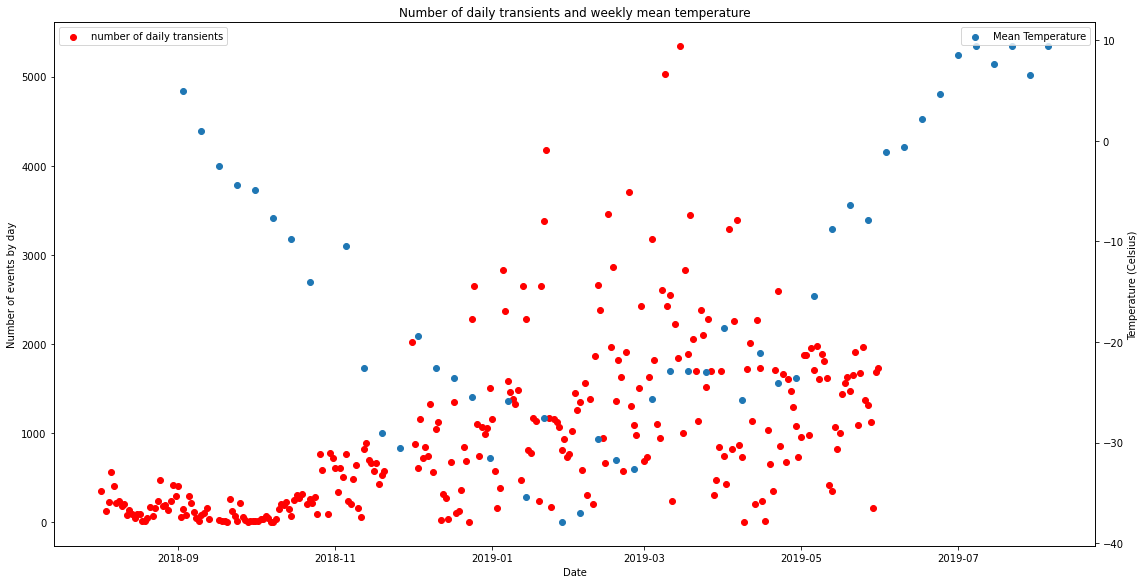

In [10]:
fig, ax = plt.subplots(figsize=(16,8))

ax.scatter(daily_transients['Date'], daily_transients['transients'], label='number of daily transients', c='r')

ax2 = ax.twinx()
ax2.scatter(temp['Date'], temp['Mean Temperature'], label='Mean Temperature')
#ax2.plot(temp['Date'], temp['Temp Change'], label='Temperature change')
#ax2.hlines(y=0, xmin=pd.to_datetime('2018/08/01'), xmax=pd.to_datetime('2019/05/30'), ls='--', label='ice melting point')

ax.legend(loc='upper left')
ax2.legend(loc='upper right')
ax.set_ylabel('Number of events by day')
ax2.set_ylabel('Temperature (Celsius)')

ax.set_xlabel('Date')

plt.tight_layout()
plt.title('Number of daily transients and weekly mean temperature')
plt.show()

In [11]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr

In [12]:
daily_temp

,Date,Air Temp,Flag,Temp Change
0,2018-08-01,7.801555,1.000000,NaN
1,2018-08-02,6.107467,1.000000,-1.694088
2,2018-08-03,6.299008,1.016667,0.191541
3,2018-08-04,8.332302,1.000000,2.033295
4,2018-08-05,7.277796,1.000000,-1.054506
...,...,...,...,...
298,2019-05-26,-3.017209,1.000000,5.597067
299,2019-05-27,-2.895389,1.432432,0.121820
300,2019-05-28,-3.078764,1.800000,-0.183375
301,2019-05-29,-2.980704,1.906704,0.098060


In [13]:
daily_transients['temp'] = np.nan
daily_transients['temp change'] = np.nan

for i in range(0, len(daily_transients)): 
    date = daily_transients.loc[i, 'Date']
    
    for j in range(0, len(daily_temp)-1): 
        if daily_temp.loc[j, 'Date'] == date: 
            temp_value  = daily_temp.loc[j, 'Air Temp']
            temp_change = daily_temp.loc[j, 'Temp Change']
            
    daily_transients.loc[i, 'temp'] = temp_value
    daily_transients.loc[i, 'temp change'] = temp_change 

In [14]:
daily_transients['continuous'] = np.nan

for i in range(0, len(daily_transients)-1): 
    date = daily_transients.loc[i, 'Date']
    
    for j in range(0, len(daily_non_transients)): 
        if daily_non_transients.loc[j, 'Date'] == date: 
            continuous_value  = daily_non_transients.loc[j, 'continuous']
            
    daily_transients.loc[i, 'continuous'] = continuous_value

In [15]:
daily_transients['relative transients'] = daily_transients['transients']/(daily_transients['transients']+daily_transients['continuous'])
daily_transients['relative continuous'] = daily_transients['continuous']/(daily_transients['transients']+daily_transients['continuous'])

In [16]:
daily_transients['relative transients']

0      0.111755
1      0.069714
2      0.058980
3      0.053529
4      0.049447
         ...   
282    0.162379
283    0.176758
284    0.136833
285    0.198798
286         NaN
Name: relative transients, Length: 287, dtype: float64

In [26]:
daily_transients.dropna(inplace=True)
daily_transients

,index,Date,transients,temp,temp change,continuous,relative transients,relative continuous
0,0,2018-08-02,347,6.107467,-1.694088,2758.0,0.111755,0.888245
1,1,2018-08-04,122,8.332302,2.033295,1628.0,0.069714,0.930286
2,2,2018-08-05,222,7.277796,-1.054506,3542.0,0.058980,0.941020
3,3,2018-08-06,559,7.077906,-0.199890,9884.0,0.053529,0.946471
4,4,2018-08-07,411,6.407442,-0.670464,7901.0,0.049447,0.950553
...,...,...,...,...,...,...,...,...
281,25,2019-05-26,1366,-3.017209,5.597067,7930.0,0.146945,0.853055
282,26,2019-05-27,1313,-2.895389,0.121820,6773.0,0.162379,0.837621
283,27,2019-05-28,1121,-3.078764,-0.183375,5221.0,0.176758,0.823242
284,28,2019-05-29,159,-2.980704,0.098060,1003.0,0.136833,0.863167


In [18]:
#check dates - there are overlap in dates, causing duplicates
daily_transients = daily_transients.drop_duplicates(['Date'])

In [34]:
#data1 = np.array(daily_transients['relative transients'])
data1 = np.array(daily_transients['transients'])
data2 = np.array(daily_transients['temp'])
#data2 = np.array(daily_transients['temp change'])
#data3 = np.array(daily_transients['relative continuous'])

In [35]:
#relative transients accounts for months where there maybe missing data. 

In [36]:
corr, _ = spearmanr(data1, data2)
print('Spearmans correlation between loud transient events and temperature: %.3f' % corr)

Spearmans correlation between loud transient events and temperature: -0.545


In [22]:
corr, _ = spearmanr(data3, data2)
print('Spearmans correlation between loud continuous events and temperature: %.3f' % corr)

Spearmans correlation between loud continuous events and temperature: 0.710


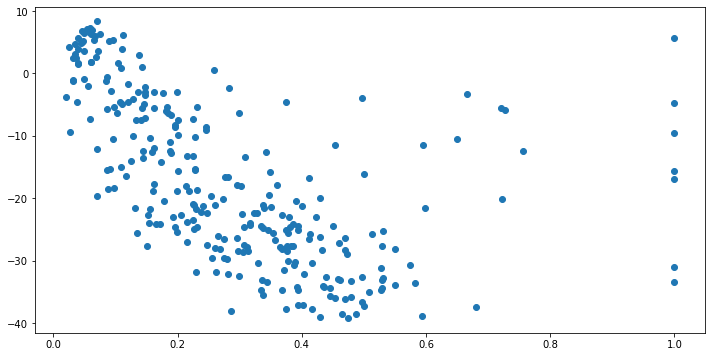

In [23]:
#checking monotomic relationship
plt.figure(figsize=(12,6))
plt.scatter(data1, data2)

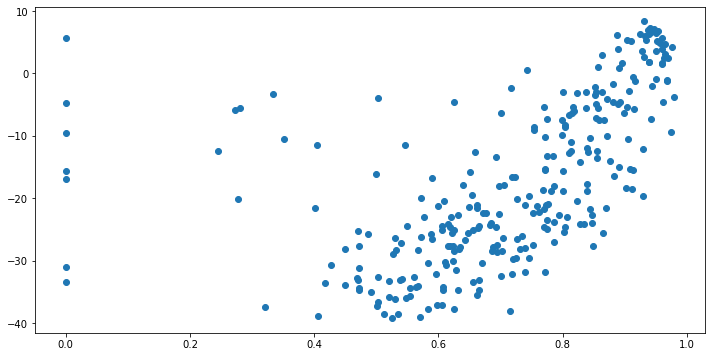

In [24]:
#checking monotomic relationship
plt.figure(figsize=(12,6))
plt.scatter(data3, data2)